# Project Proposal: Predicting Credit Card Approval

 In the ever-evolving landscape of the financial sector, data science has become a cornerstone for informed decision-making. This project aims to delve into the world of credit card approval prediction, utilizing both data analysis and machine learning techniques.



## Introduction


Banks, particularly credit card departments, have been pioneers in adopting data science for credit assessment. The conventional approach involves utilizing credit scoring systems, such as application scorecards, to estimate an applicant's risk level. As part of our ongoing efforts to enhance credit decision strategies, we are undertaking a comprehensive analysis of credit card applications.

## Objective

The primary goal of this project is to develop predictive models that can effectively assess the likelihood of credit card approval based on various applicant attributes. By leveraging historical data, we aim to identify patterns, correlations, and crucial features that significantly influence credit decisions.


# Importance in Today's World:
- Evaluating creditworthiness is crucial for minimizing financial risk for banks.
    - Banks operate in a dynamic financial landscape, and assessing creditworthiness is essential to mitigate the risk associated with lending. Predictive modeling provides a systematic and data-driven approach to evaluate an individual's ability to repay credit.
- Predictive models contribute to efficient decision-making in the credit card application process.
    - Predictive models enable automation and optimization, reducing manual efforts and enhancing the speed and accuracy of decision-making.
- By understanding the key factors influencing credit approval, banks can tailor their credit card offerings and strategies. This not only improves risk management but also enhances the overall customer experience by providing personalized and well-informed financial solutions.

# What impact does predicting a good client have on a bank's profitability and risk management?
- Predicting a good client positively impacts a bank's profitability by reducing the risk of default. Accurate predictions help in approving credit cards for customers who are likely to meet their financial obligations, leading to fewer defaults and increased revenue. This, in turn, improves risk management practices and contributes to a healthier financial portfolio.

# How is it going to impact the banking sector?
-  Our project's impact on the banking sector extends beyond individual credit card approvals; it addresses core operational aspects, risk management, customer relations, and the industry's responsiveness to external factors. This holistic approach is designed to foster a resilient, customer-centric, and forward-looking banking ecosystem.

# Gap in Knowledge:
- While traditional credit scoring methods exist, there may be specific relationships and patterns within the dataset that are not captured by conventional approaches. Exploring these relationships can uncover valuable insights for refining credit assessment strategies.
- The proposed approach can provide valuable insights for banks in India, helping them refine their credit assessment strategies.

    - The banking sector in India faces unique challenges and opportunities. Tailoring predictive models to the Indian context can provide banks with actionable insights, helping them make informed decisions and stay ahead in a rapidly evolving financial landscape.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing datasets
data_set1 = pd.read_csv("/content/Credit_card.csv")
data_set2 = pd.read_csv("/content/Credit_card_label.csv")

In [3]:
# Merging both datasets
credit_card_df = pd.merge(data_set1,data_set2,on='Ind_ID',how='inner')


In [4]:
credit_card_df.shape

(1548, 19)

In [5]:
credit_card_df.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [6]:
credit_card_df.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


In [7]:
credit_card_df.duplicated().sum()

0

In [8]:
# making a copy of original dataset
cc_df = credit_card_df.copy()
cc_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [9]:
# Displaying descriptive statistics
cc_df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [10]:
# Displaying information about the structure and data types of columns in the DataFrame
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [11]:
# calculating the pairwise correlation coefficients
cc_df.corr()

<ipython-input-11-7e19f26538e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cc_df.corr()


,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
Ind_ID,1.000000,0.032535,0.030147,0.022909,-0.055396,NaN,0.085794,0.008403,-0.037923,0.016950,0.016796
CHILDREN,0.032535,1.000000,0.078497,0.279716,-0.219095,NaN,0.035014,-0.004908,0.025776,0.890248,-0.021646
Annual_income,0.030147,0.078497,1.000000,0.111638,-0.160175,NaN,-0.071171,-0.006439,0.122320,0.050957,0.027456
Birthday_count,0.022909,0.279716,0.111638,1.000000,-0.619039,NaN,0.174687,-0.029215,0.166749,0.266527,-0.045097
Employed_days,-0.055396,-0.219095,-0.160175,-0.619039,1.000000,NaN,-0.231184,-0.003403,-0.118268,-0.238705,0.031408
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Phone,0.085794,0.035014,-0.071171,0.174687,-0.231184,NaN,1.000000,0.352439,-0.009594,0.072228,-0.007046
Phone,0.008403,-0.004908,-0.006439,-0.029215,-0.003403,NaN,0.352439,1.000000,0.018105,0.005372,-0.000664
EMAIL_ID,-0.037923,0.025776,0.122320,0.166749,-0.118268,NaN,-0.009594,0.018105,1.000000,0.035098,0.012921
Family_Members,0.016950,0.890248,0.050957,0.266527,-0.238705,NaN,0.072228,0.005372,0.035098,1.000000,-0.030709


## Data Exploration:
- Check for missing values in the dataset.
- Understand the distribution of numerical features.
- Explore the unique values in categorical columns.

In [12]:
# Check for missing values
missing_values = cc_df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64


In [13]:
cc_df.head(2)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


## Handling Missing values

In [14]:
cc_df.Type_Occupation.fillna(cc_df.Type_Occupation.mode()[0], inplace=True)


In [15]:
cc_df.GENDER.fillna(cc_df.GENDER.mode()[0], inplace=True)

In [16]:
cc_df.Annual_income.fillna(cc_df.Annual_income.median(),inplace=True)

Converting Birthday_count, Employed_days into years, and dealing with missing values in Birthday_count column

In [17]:
cc_df['Birthday_count'] = abs(cc_df['Birthday_count'] / 365).round()
cc_df.Birthday_count

0       51.0
1       37.0
2        NaN
3       37.0
4       37.0
        ... 
1543    33.0
1544    28.0
1545    36.0
1546    42.0
1547    45.0
Name: Birthday_count, Length: 1548, dtype: float64

In [18]:

cc_df.Employed_days = abs(cc_df.Employed_days/365).round()
cc_df.Employed_days


0       1001.0
1          2.0
2          2.0
3          2.0
4          2.0
         ...  
1543       6.0
1544       3.0
1545       7.0
1546       2.0
1547       8.0
Name: Employed_days, Length: 1548, dtype: float64

In [19]:
cc_df.Birthday_count.fillna(cc_df.Birthday_count.median(),inplace=True)

In [20]:
cc_df.Birthday_count

0       51.0
1       37.0
2       43.0
3       37.0
4       37.0
        ... 
1543    33.0
1544    28.0
1545    36.0
1546    42.0
1547    45.0
Name: Birthday_count, Length: 1548, dtype: float64

Renaming the columns

In [21]:
cc_df.rename(columns = {"Ind_ID" : 'id',
                        "GENDER" : 'gender',
                        "Car_Owner" : 'own_car',
                        "Propert_Owner" : 'own_property',
                        "CHILDREN" : 'children',
                        "Annual_income" : 'annual_income',
                        "Type_Income" : 'income_type',
                        "EDUCATION" : 'education_level',
                        'Marital_status' : 'marital_status',
                        'Housing_type' : 'housing_type',
                        "Birthday_count" : 'age',
                        "Employed_days" : 'experience_yrs',
                        'Mobile_phone' : 'mobile_phone',
                        'Work_Phone' : 'work_phone',
                        'Phone' : 'phone',
                        'EMAIL_ID' : 'email_id',
                        'Type_Occupation' : 'occupation_type',
                        'Family_Members' : 'family_members'
                       },inplace = True)

In [22]:
cc_df.head(2)

,id,gender,own_car,own_property,children,annual_income,income_type,education_level,marital_status,housing_type,age,experience_yrs,mobile_phone,work_phone,phone,email_id,occupation_type,family_members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,1001.0,1,0,0,0,Laborers,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Laborers,2,1


setting the values in 'experience_yrs'

In [23]:
cc_df['experience_yrs'] = np.where(cc_df['experience_yrs'] > 50, np.nan, cc_df['experience_yrs'])

# Drop rows with NaN values in the 'experience_yrs' column
cc_df.dropna(subset=['experience_yrs'], inplace=True)
cc_df.head()

,id,gender,own_car,own_property,children,annual_income,income_type,education_level,marital_status,housing_type,age,experience_yrs,mobile_phone,work_phone,phone,email_id,occupation_type,family_members,label
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Laborers,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,43.0,2.0,1,1,1,0,Laborers,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Laborers,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Laborers,2,1
5,5009753,F,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Laborers,2,1


## Exploratory Data Analysis (EDA):

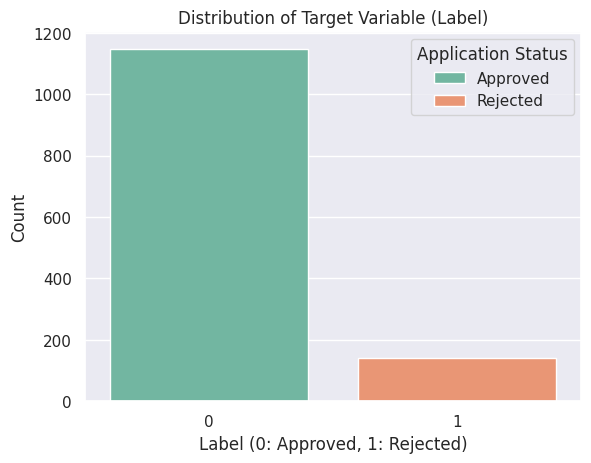

In [24]:
# Visualize the distribution of the target variable 'Label'

sns.set(style='darkgrid')

# Countplot with legend
ax = sns.countplot(x='label', hue='label', data=cc_df, palette='Set2')

# Set labels and title
plt.xlabel('Label (0: Approved, 1: Rejected)')
plt.ylabel('Count')
plt.title('Distribution of Target Variable (Label)')

# Remove the legend title
ax.legend(labels=['Approved', 'Rejected'], title='Application Status')

# Show the plot
plt.show()

In [25]:
# making a copy for EDA
cc_df_eda = cc_df.copy()
cc_df_eda.head(3)

,id,gender,own_car,own_property,children,annual_income,income_type,education_level,marital_status,housing_type,age,experience_yrs,mobile_phone,work_phone,phone,email_id,occupation_type,family_members,label
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Laborers,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,43.0,2.0,1,1,1,0,Laborers,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Laborers,2,1


## Univariate Analysis:
 - For categorical variables, you can use count plots to visualize the distribution of each category.
 - For numerical variables, you can use histograms to understand the distribution of values.


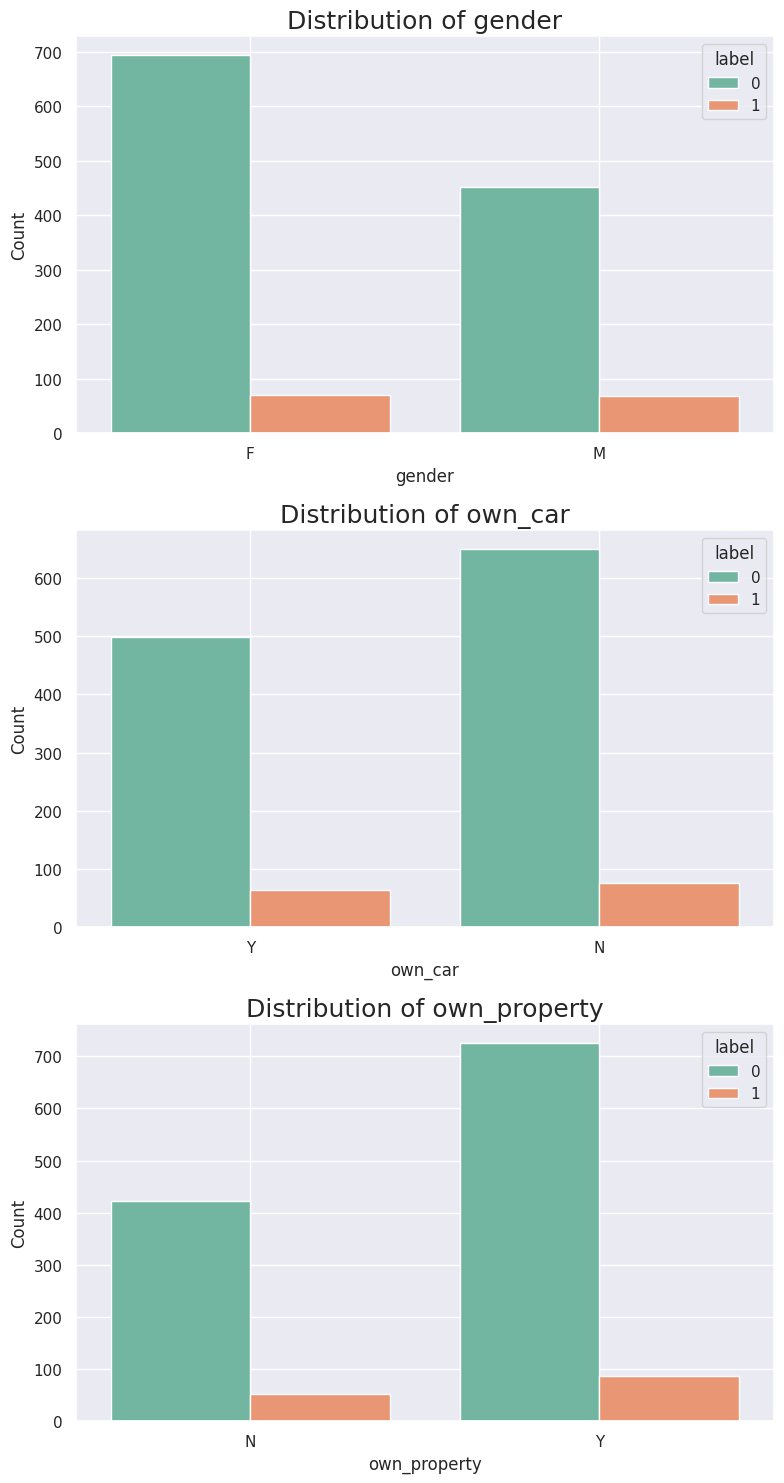

In [26]:
# List of columns for univariate analysis
cat_cols1 = ['gender', 'own_car', 'own_property']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(cat_cols1), figsize=(8, 5 * len(cat_cols1)))

# Plot univariate distributions for each column
for col in cat_cols1:
    i = cat_cols1.index(col)
    sns.countplot(data=cc_df_eda, x=col,hue='label', ax=axes[i], palette='Set2')

    axes[i].set_title(f'Distribution of {col}', fontsize=18)
    axes[i].set_ylabel('Count')
    axes[i].grid(True)

plt.tight_layout()
plt.show()




1. **Gender Distribution:**
   - The count plot for "gender" indicates that there are more females than males in the dataset.
   - We can interprete that the dataset appears to have a higher representation of females applicants for credit card compared to males.

2. **Car Ownership Distribution:**
   - The count plot for "own_car" suggests that a majority of individuals in the dataset do not own a car (N > Y).
   - Car ownership is less common among the individuals in the dataset.

3. **Property Ownership Distribution:**
   - The count plot for "own_property" shows that a majority of individuals own property (Y > N).
   - Property ownership is more prevalent among the individuals in the dataset.


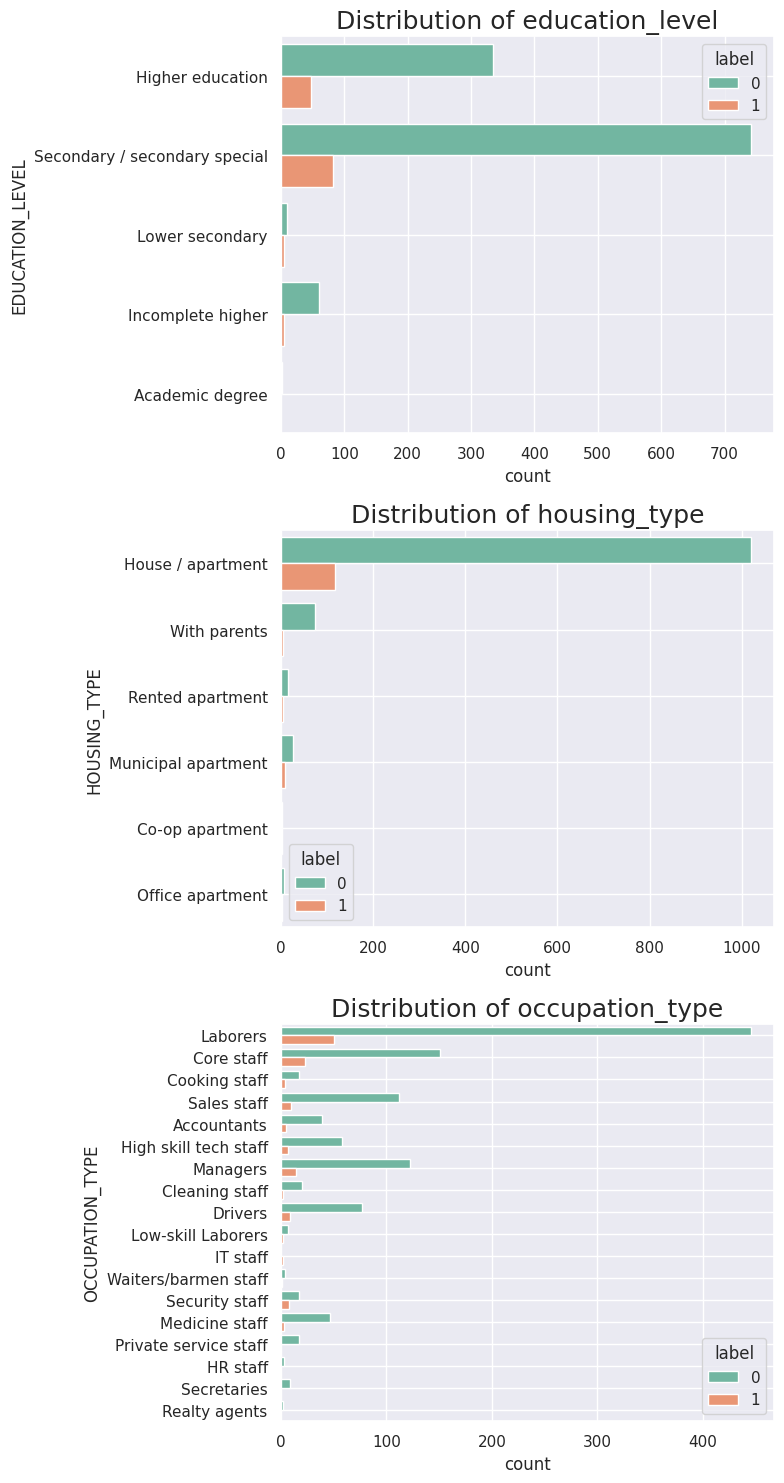

In [27]:
# List of columns for univariate analysis
cat_cols2 = ['education_level', 'housing_type','occupation_type']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(cat_cols2), figsize=(8, 5 * len(cat_cols2)))

# Plot univariate distributions for each column
for col in cat_cols2:
    i = cat_cols2.index(col)
    sns.countplot(data=cc_df_eda, y=col,hue='label', ax=axes[i], palette='Set2')

    axes[i].set_title(f'Distribution of {col}', fontsize=18)
    axes[i].set_ylabel(col.upper())
    axes[i].grid(True)

plt.tight_layout()
plt.show()




1. **Education Level Distribution:**
   - The count plot for "education_level" indicates that majority of applicants were completed Secondary Education only.

2. **Housing Type Distribution:**
   - The count plot for "housing_type" suggests that a majority of individuals reside in apartments

3. **Occupation Type Distribution:**
   - The count plot for "occupation_type" shows that most of the applicants are labourer's by occupation.


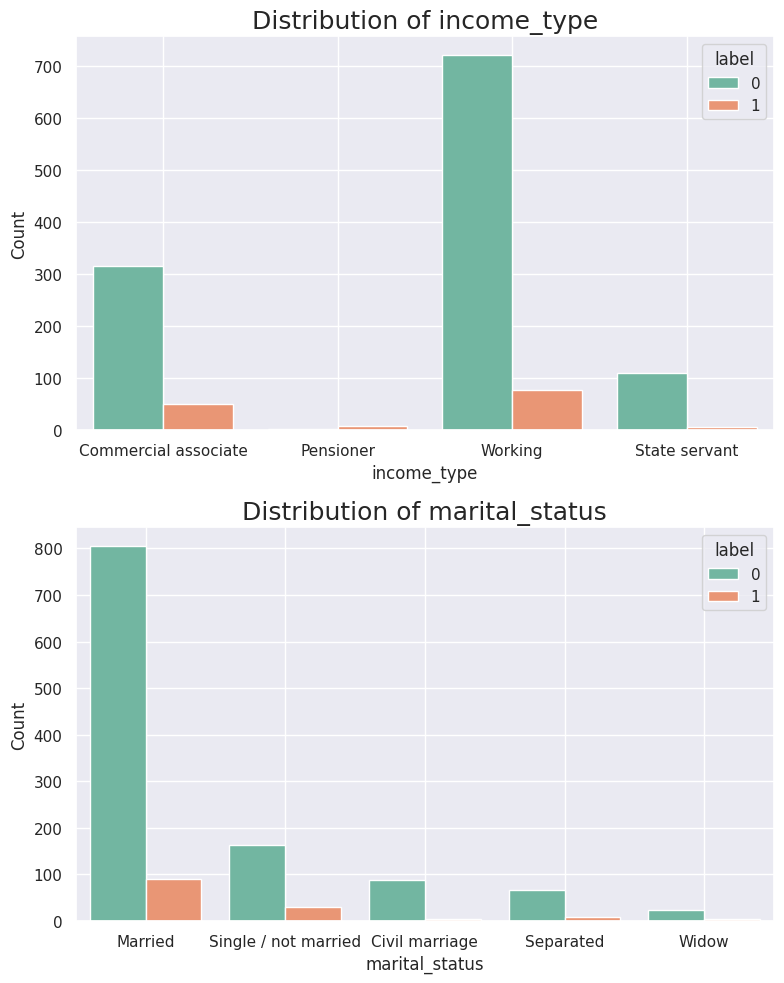

In [28]:
# List of columns for univariate analysis
cat_cols3 = ['income_type', 'marital_status'  ]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(cat_cols3), figsize=(8, 5 * len(cat_cols3)))

# Plot univariate distributions for each column
for col in cat_cols3:
    i = cat_cols3.index(col)
    sns.countplot(data=cc_df_eda, x=col,hue='label', ax=axes[i], palette='Set2')

    axes[i].set_title(f'Distribution of {col}', fontsize=18)
    axes[i].set_ylabel('Count')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

1. **Income Type Distribution:**
   - The count plot for "income_type" indicates that majority of applicants were Working class.

2. **Marital Status Distribution:**
   - The count plot for "marital_status" suggests that a majority of individuals were married

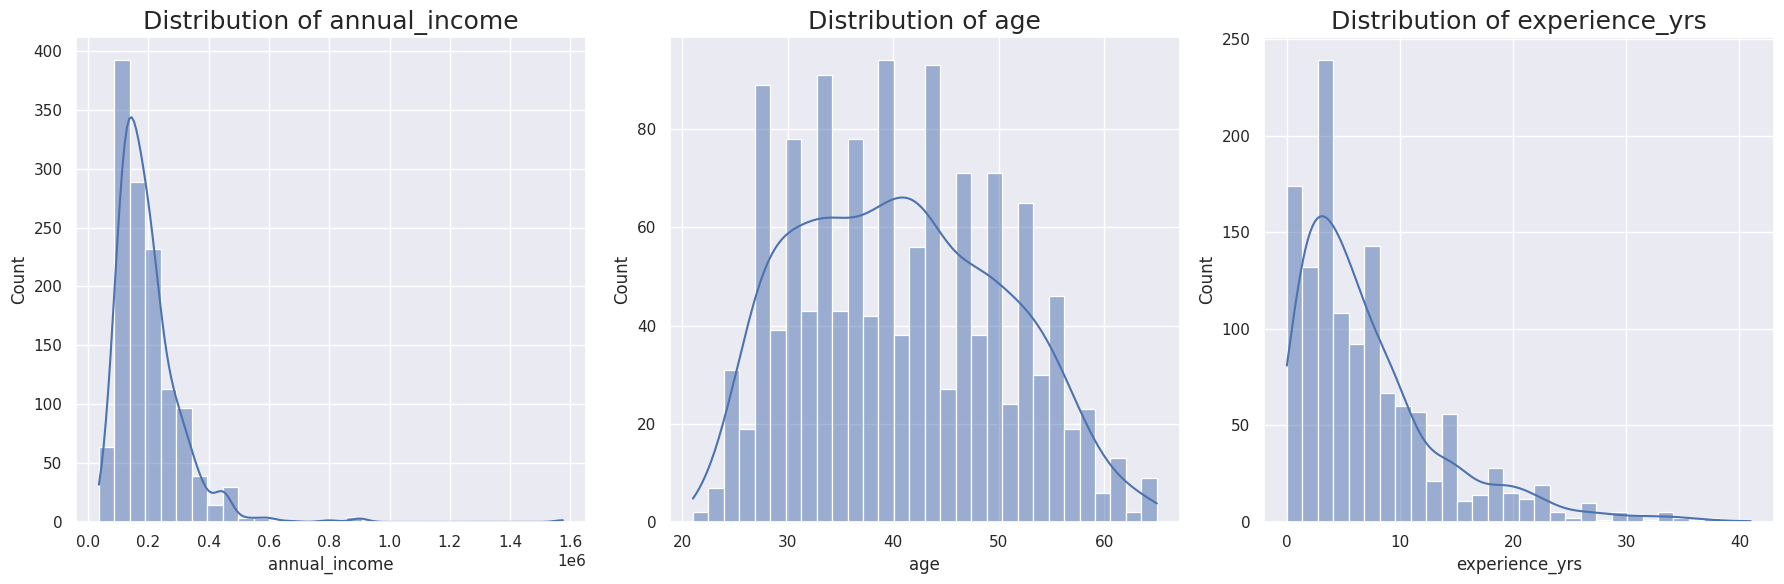

In [29]:
# List of numerical columns
numerical_cols = ['annual_income', 'age', 'experience_yrs']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(18, 6))

# Plot univariate distributions for each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(data=cc_df_eda, x=col, kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}', fontsize=18)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
    axes[i].grid(True)

plt.tight_layout()
plt.show()


**Annual Income Distribution:**
- The annual income distribution is  right-skewed, suggesting that most individuals have a lower to medium income and consists of  few outliers in the higher income range

In [30]:
cc_df_eda.columns

Index(['id', 'gender', 'own_car', 'own_property', 'children', 'annual_income',
       'income_type', 'education_level', 'marital_status', 'housing_type',
       'age', 'experience_yrs', 'mobile_phone', 'work_phone', 'phone',
       'email_id', 'occupation_type', 'family_members', 'label'],
      dtype='object')

## Bivariate Analysis
- scatter plot
- Box plot

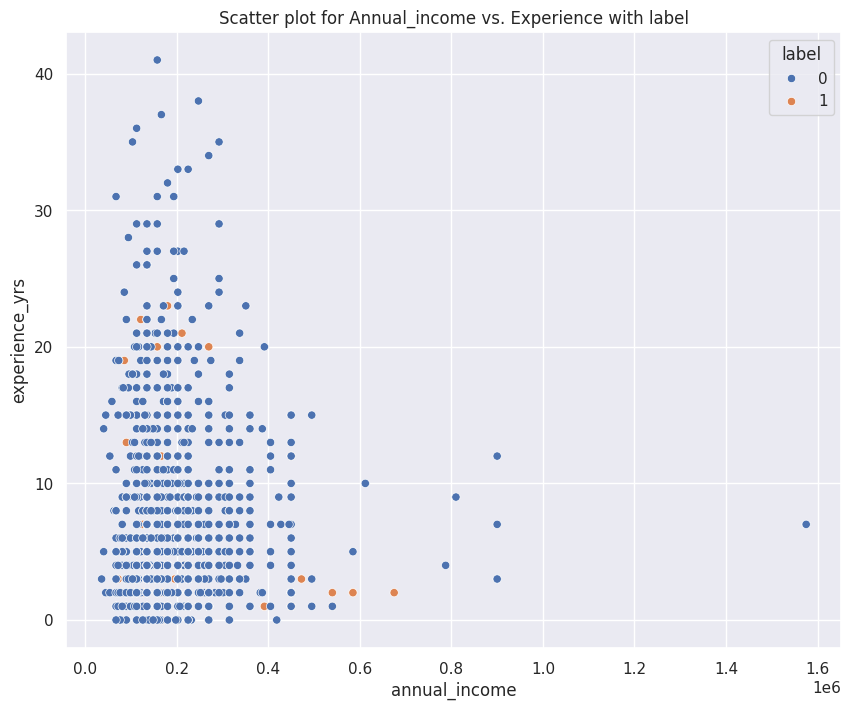

In [31]:
# Scatter plot for numerical variables
plt.figure(figsize=(10, 8))
sns.scatterplot(data=cc_df_eda, x='annual_income', y='experience_yrs', hue='label')
plt.title('Scatter plot for Annual_income vs. Experience with label')
plt.show()

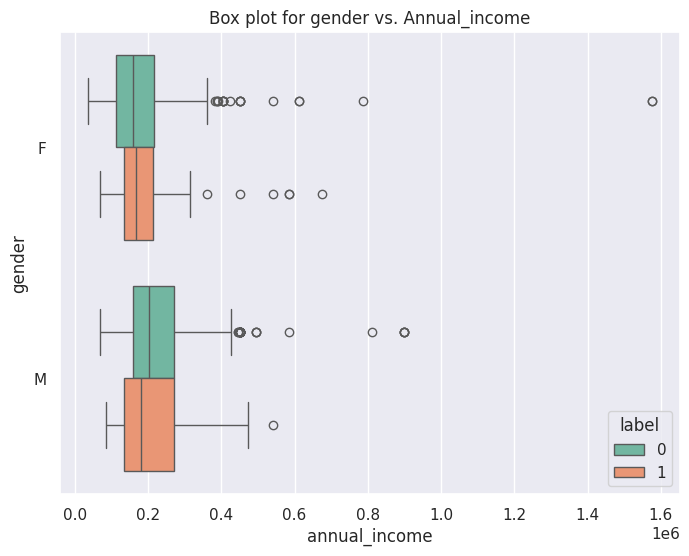

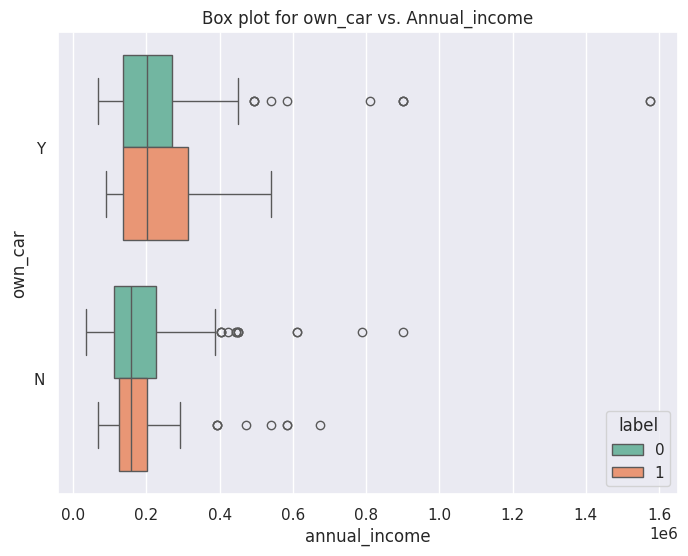

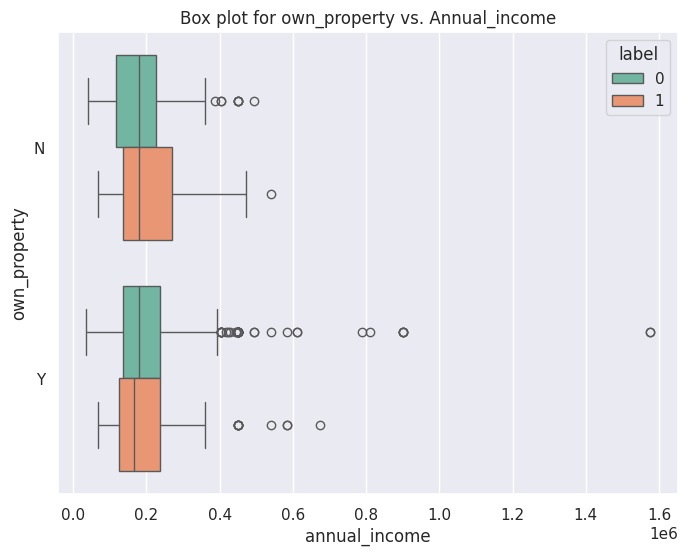

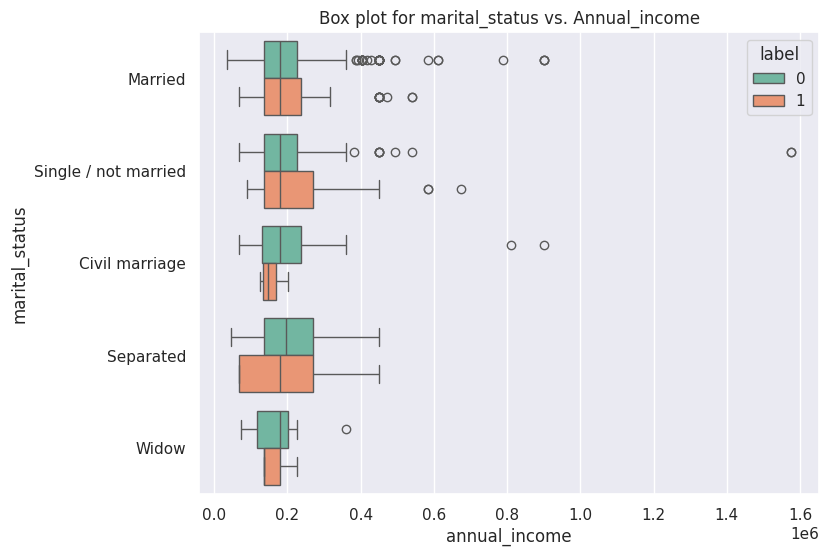

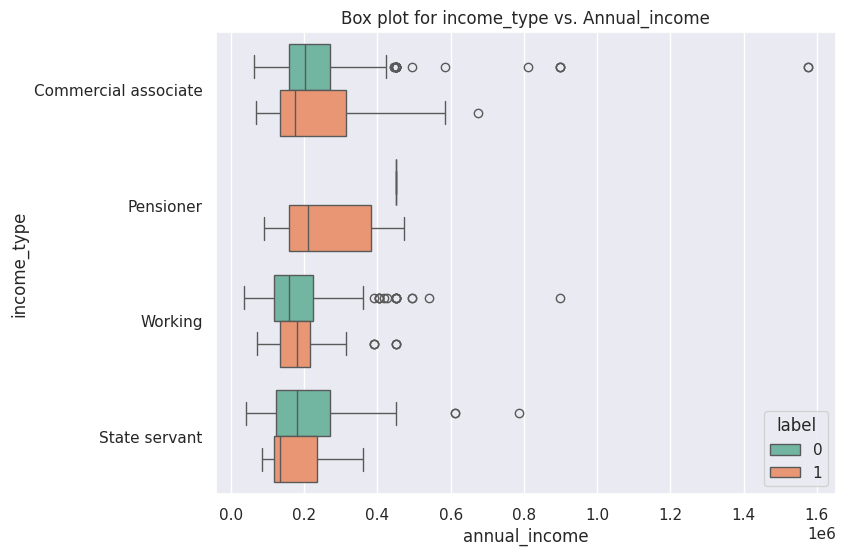

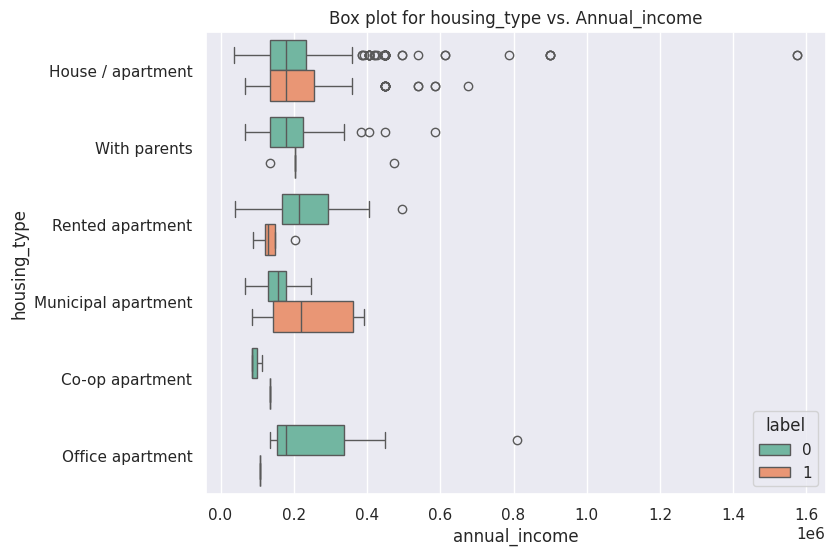

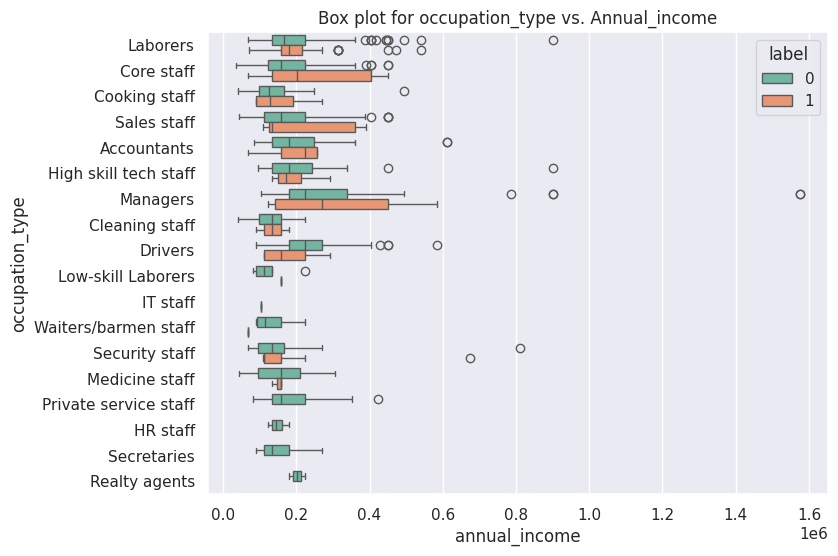

In [32]:
# boxplot for categorical values
cat_vars = ['gender', 'own_car', 'own_property', 'marital_status', 'income_type', 'housing_type', 'occupation_type']

for var in cat_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=cc_df_eda, y=var, x='annual_income',hue='label', palette='Set2')
    plt.title(f'Box plot for {var} vs. Annual_income')
    plt.show()

 **annual_income vs gender :**
 - Annual income of gender Male is higher than that of female, this shows the higher number of female applicants from the previous analysis.

**annual_income vs own_car :**
- higher income applicants owns majority of cars

**annual_income vs education_level :**
- higher income applicants have an academic degree

**annual_income vs occupation_type :**
- Managers drawing higher income

## One-Hot Encoding

In [33]:
import pandas as pd

# Choose the top N most frequent categories
N = 5

# Encode the other categorical columns
cc_df_encoded = pd.get_dummies(cc_df, columns=['gender', 'own_car', 'own_property', 'marital_status', 'income_type', 'housing_type'], drop_first=True)

# Identify the top N most frequent occupations
top_n_occupations = cc_df['occupation_type'].value_counts().nlargest(N).index

# Create a new column 'occupation_type_encoded' by grouping less frequent categories into 'Other'
cc_df_encoded['occupation_type_encoded'] = cc_df['occupation_type'].apply(lambda x: x if x in top_n_occupations else 'Other')

# Drop the original 'occupation_type' column
cc_df_encoded.drop('occupation_type', axis=1, inplace=True)

# Apply one-hot encoding to the new 'occupation_type_encoded' column
cc_df_encoded = pd.get_dummies(cc_df_encoded, columns=['occupation_type_encoded'], drop_first=True)


In [34]:
cc_df_encoded.head()

,id,children,annual_income,education_level,age,experience_yrs,mobile_phone,work_phone,phone,email_id,...,housing_type_House / apartment,housing_type_Municipal apartment,housing_type_Office apartment,housing_type_Rented apartment,housing_type_With parents,occupation_type_encoded_Drivers,occupation_type_encoded_Laborers,occupation_type_encoded_Managers,occupation_type_encoded_Other,occupation_type_encoded_Sales staff
1,5009744,0,315000.0,Higher education,37.0,2.0,1,1,1,0,...,1,0,0,0,0,0,1,0,0,0
2,5009746,0,315000.0,Higher education,43.0,2.0,1,1,1,0,...,1,0,0,0,0,0,1,0,0,0
3,5009749,0,166500.0,Higher education,37.0,2.0,1,1,1,0,...,1,0,0,0,0,0,1,0,0,0
4,5009752,0,315000.0,Higher education,37.0,2.0,1,1,1,0,...,1,0,0,0,0,0,1,0,0,0
5,5009753,0,315000.0,Higher education,37.0,2.0,1,1,1,0,...,1,0,0,0,0,0,1,0,0,0


In [35]:
cc_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 1 to 1547
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1287 non-null   int64  
 1   children                             1287 non-null   int64  
 2   annual_income                        1287 non-null   float64
 3   education_level                      1287 non-null   object 
 4   age                                  1287 non-null   float64
 5   experience_yrs                       1287 non-null   float64
 6   mobile_phone                         1287 non-null   int64  
 7   work_phone                           1287 non-null   int64  
 8   phone                                1287 non-null   int64  
 9   email_id                             1287 non-null   int64  
 10  family_members                       1287 non-null   int64  
 11  label                         

## Ordinal Encoding

In [36]:
cc_df_encoded['education_level'].value_counts()

Secondary / secondary special    823
Higher education                 383
Incomplete higher                 65
Lower secondary                   14
Academic degree                    2
Name: education_level, dtype: int64

In [37]:
from sklearn.preprocessing import OrdinalEncoder


cols_order = ['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Academic degree']

# Create an instance of OrdinalEncoder with specified categories
encoder = OrdinalEncoder(categories=[cols_order])

# Fit and transform the 'education_level' column
cc_df_encoded[['education_level']] = encoder.fit_transform(cc_df_encoded[['education_level']])


In [38]:
cc_df.education_level.value_counts()

Secondary / secondary special    823
Higher education                 383
Incomplete higher                 65
Lower secondary                   14
Academic degree                    2
Name: education_level, dtype: int64

In [39]:
cc_df_encoded.corr()

,id,children,annual_income,education_level,age,experience_yrs,mobile_phone,work_phone,phone,email_id,...,housing_type_House / apartment,housing_type_Municipal apartment,housing_type_Office apartment,housing_type_Rented apartment,housing_type_With parents,occupation_type_encoded_Drivers,occupation_type_encoded_Laborers,occupation_type_encoded_Managers,occupation_type_encoded_Other,occupation_type_encoded_Sales staff
id,1.000000,0.017917,0.027176,-0.022755,0.012596,-0.016595,NaN,0.082469,0.014108,-0.044210,...,-0.045184,0.055402,0.015001,-0.002836,0.006301,-0.013447,-0.050614,-0.001419,0.074791,-0.000686
children,0.017917,1.000000,0.049692,0.037833,-0.179383,-0.020142,NaN,-0.016597,-0.008798,-0.000127,...,0.040782,-0.034495,-0.004590,-0.021275,-0.008440,0.048727,-0.025797,0.022783,-0.021024,-0.011977
annual_income,0.027176,0.049692,1.000000,0.230922,-0.008123,-0.015654,NaN,-0.117531,-0.002957,0.110688,...,0.016387,-0.028470,0.042579,0.018054,-0.013832,0.068338,-0.071502,0.270185,-0.091101,-0.055473
education_level,-0.022755,0.037833,0.230922,1.000000,-0.139397,-0.071338,NaN,-0.023082,0.043288,0.108485,...,0.022329,-0.068623,-0.007608,-0.018931,0.034218,-0.073935,-0.106179,0.229453,-0.047605,-0.054491
age,0.012596,-0.179383,-0.008123,-0.139397,1.000000,0.337343,NaN,-0.040285,0.048399,-0.122987,...,0.170488,-0.043539,0.053657,-0.070912,-0.189767,0.012903,-0.007810,-0.020939,0.111208,-0.081141
experience_yrs,-0.016595,-0.020142,-0.015654,-0.071338,0.337343,1.000000,NaN,0.027742,0.040475,-0.097478,...,0.074049,-0.017811,0.014579,-0.032529,-0.082808,-0.078558,-0.002336,0.007648,0.086950,-0.110492
mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_phone,0.082469,-0.016597,-0.117531,-0.023082,-0.040285,0.027742,NaN,1.000000,0.396304,-0.039169,...,-0.034677,0.029446,-0.005420,-0.014560,0.022175,-0.003712,-0.017870,-0.000154,0.023870,-0.027704
phone,0.014108,-0.008798,-0.002957,0.043288,0.048399,0.040475,NaN,0.396304,1.000000,0.015733,...,0.035570,-0.014788,-0.036091,-0.016305,-0.026454,-0.017909,-0.018860,-0.017286,0.033052,-0.010454
email_id,-0.044210,-0.000127,0.110688,0.108485,-0.122987,-0.097478,NaN,-0.039169,0.015733,1.000000,...,0.002400,0.000058,-0.029201,0.017000,0.003730,-0.063039,-0.053831,-0.013749,0.014721,0.049768


## Based on the correlation matrix and the context of predicting credit card approval, we can consider dropping these columns:
- 'mobile_phone': All values are NaN, and it doesn't seem to provide useful information.
- 'age': Since we have 'experience_yrs,' we might consider dropping one of them, as they are positively correlated.
- 'family_members': It is strongly correlated with 'children.' Depending on the business context, we can one of them.
-'email_id': It has a weak correlation with the target variable and might not be relevant for credit card approval prediction.


In [40]:
correlation_matrix = cc_df_encoded[['experience_yrs', 'age', 'label']].corr()
print(correlation_matrix)


                experience_yrs       age     label
experience_yrs        1.000000  0.337343 -0.101461
age                   0.337343  1.000000  0.022892
label                -0.101461  0.022892  1.000000




*    'age': The correlation between 'age' and the target variable is relatively low (0.022892). If it doesn't have strong predictive power, dropping 'age' will be a reasonable choice.
*    'experience_yrs': Although the correlation with 'label' is not very strong (-0.101461), it has a higher absolute correlation compared to 'age.' Additionally, the negative correlation suggests that as 'experience_yrs' increases, the likelihood of label 0 (approval) increases.



In [41]:
columns_to_drop = ['mobile_phone', 'age', 'family_members', 'email_id','phone']
cc_df_encoded.drop(columns=columns_to_drop, inplace=True)

In [42]:
cc_df_encoded.head()

,id,children,annual_income,education_level,experience_yrs,work_phone,label,gender_M,own_car_Y,own_property_Y,...,housing_type_House / apartment,housing_type_Municipal apartment,housing_type_Office apartment,housing_type_Rented apartment,housing_type_With parents,occupation_type_encoded_Drivers,occupation_type_encoded_Laborers,occupation_type_encoded_Managers,occupation_type_encoded_Other,occupation_type_encoded_Sales staff
1,5009744,0,315000.0,3.0,2.0,1,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,5009746,0,315000.0,3.0,2.0,1,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,5009749,0,166500.0,3.0,2.0,1,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,5009752,0,315000.0,3.0,2.0,1,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
5,5009753,0,315000.0,3.0,2.0,1,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0


## checking and handling outliers

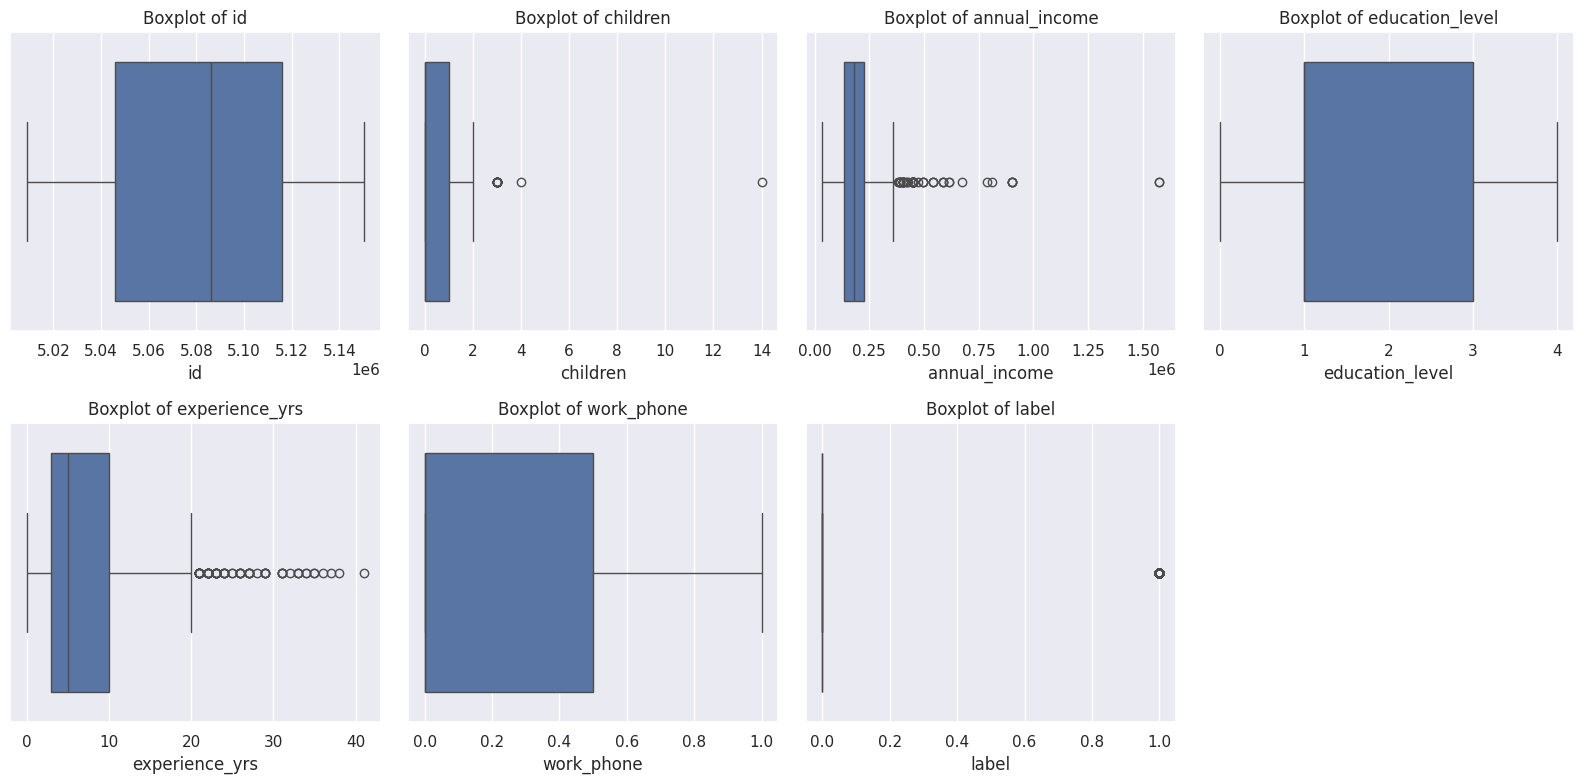

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = cc_df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of subplots needed
num_subplots = len(numerical_columns)

# Create subplots
fig, axes = plt.subplots(2, (num_subplots + 1) // 2, figsize=(16, 8))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot box plots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=cc_df_encoded[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Remove any unused subplots
for j in range(num_subplots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


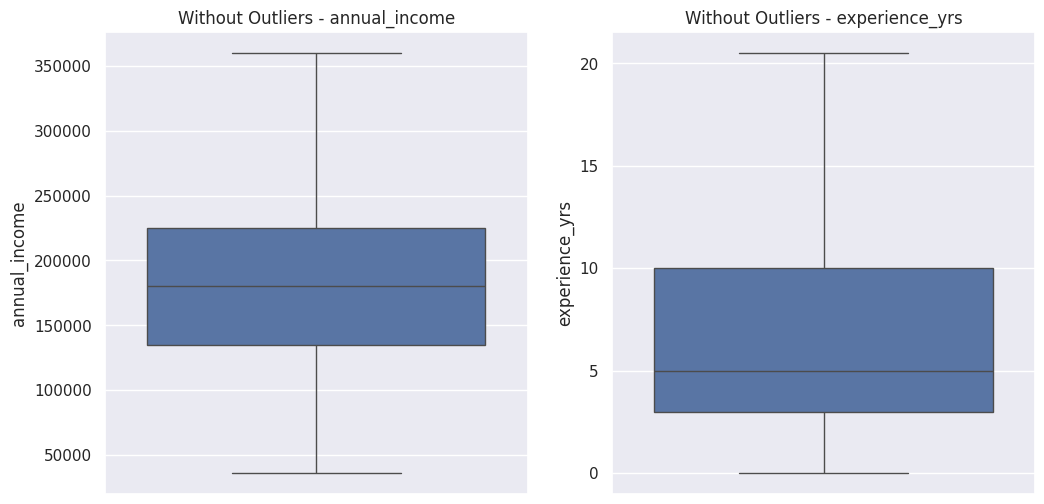

In [44]:
columns_with_outliers = ['annual_income', 'experience_yrs']

for column in columns_with_outliers:
    Q1 = cc_df_encoded[column].quantile(0.25)
    Q3 = cc_df_encoded[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - (1.5 * IQR)
    upper_fence = Q3 + (1.5 * IQR)

    cc_df_encoded[column] = cc_df_encoded[column].clip(lower_fence, upper_fence)

# Plot boxplots after removing outliers
plt.figure(figsize=(12, 6))
for i, column in enumerate(columns_with_outliers, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(cc_df_encoded[column])
    plt.title(f"Without Outliers - {column}")

plt.show()


In [45]:
cc_df_encoded[['annual_income','experience_yrs']]

,annual_income,experience_yrs
1,315000.0,2.0
2,315000.0,2.0
3,166500.0,2.0
4,315000.0,2.0
5,315000.0,2.0
...,...,...
1543,166500.0,6.0
1544,225000.0,3.0
1545,180000.0,7.0
1546,270000.0,2.0


## Addressing imbalance classes in target variable ('label')
- The majority class (0) has significantly more samples than the minority class (1).
- In credit card approval, imbalanced classes can impact the model's performance, as the model might become biased toward the majority class.
- Oversampling: We can increase the number of samples from the minority class using technique
    - SMOTE - Synthetic Minority Over-sampling Technique.

In [46]:
cc_df_encoded['label'].value_counts()

0    1147
1     140
Name: label, dtype: int64

Label:

- 0 is application approved
- 1 is application rejected

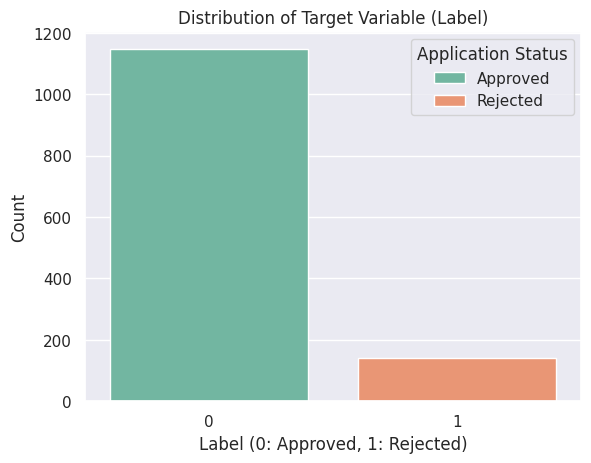

In [47]:
# Visualize the distribution of the target variable 'Label'

sns.set(style='darkgrid')

# Countplot with legend
ax = sns.countplot(x='label', hue='label', data=cc_df_encoded, palette='Set2')

# Set labels and title
plt.xlabel('Label (0: Approved, 1: Rejected)')
plt.ylabel('Count')
plt.title('Distribution of Target Variable (Label)')

# Remove the legend title
ax.legend(labels=['Approved', 'Rejected'], title='Application Status')

# Show the plot
plt.show()

In [48]:
# Separate features and target variable
X = cc_df_encoded.drop('label', axis=1)
y = cc_df_encoded['label']

In [49]:
from imblearn.over_sampling import SMOTE

# apply smote
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X,y)
y.value_counts()

1    1147
0    1147
Name: label, dtype: int64

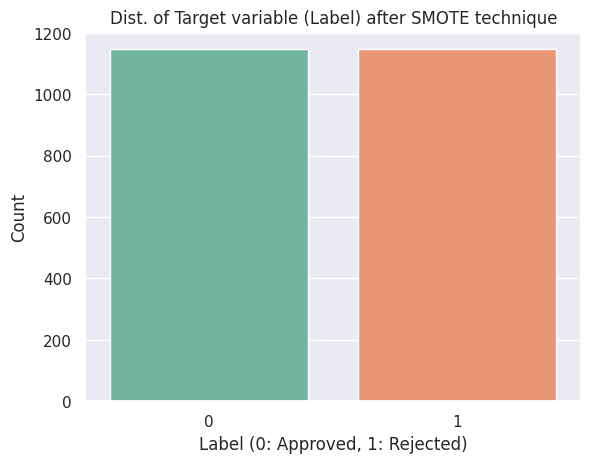

In [50]:
# Visualize the distribution of the target variable 'Label'
sns.set(style='darkgrid')

# Countplot with legend
ax = sns.countplot(data= cc_df, x=y, hue=y, legend=False, palette='Set2')

# Set labels and title
plt.xlabel('Label (0: Approved, 1: Rejected)')
plt.ylabel('Count')
plt.title("Dist. of Target variable (Label) after SMOTE technique")

# Show the plot
plt.show()

## Split the data into training and testing sets

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1835, 26) (1835,)
(459, 26) (459,)


## Feature scaling using Min-Max scaling

In [52]:
# normalization
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_normal = mms.fit_transform(X_train)
X_test_normal = mms.transform(X_test)

# **Model Training**

# LOGISTIC REGRESSION

In [53]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression model
log_reg_model = LogisticRegression()

In [54]:
# fit the model to your training data
log_reg_model.fit(X_train_normal,y_train)

LogisticRegression()

In [55]:
log_reg_model.score(X_train_normal,y_train)

0.8217983651226158

In [56]:
prediction_prob = log_reg_model.predict_proba(X_test_normal)
prediction_prob_df = pd.DataFrame(data=prediction_prob, columns=['0','1'])

prediction_prob_df['total_prob'] = prediction_prob_df['0'] + prediction_prob_df['1']

prediction_prob_df.head()

,0,1,total_prob
0,0.869562,0.130438,1.0
1,0.130870,0.869130,1.0
2,0.411747,0.588253,1.0
3,0.852368,0.147632,1.0
4,0.552456,0.447544,1.0


In [57]:
# Predictions on the test set
log_reg_predict_result = log_reg_model.predict(X_test_normal)
print(log_reg_predict_result)

[0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0
 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1
 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1
 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1
 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1
 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0
 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0
 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0
 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0
 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1]


In [58]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,classification_report,roc_auc_score,f1_score
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_predict_result))
print("Classification Report:\n", classification_report(y_test, log_reg_predict_result))

Logistic Regression Accuracy: 0.8061002178649237
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       220
           1       0.82      0.81      0.81       239

    accuracy                           0.81       459
   macro avg       0.81      0.81      0.81       459
weighted avg       0.81      0.81      0.81       459



In [59]:
print(round(precision_score(y_test, log_reg_predict_result), 2))

0.82


In [60]:
print(round(recall_score(y_test, log_reg_predict_result), 2))

0.81


In [61]:
confusion_matrix(y_test,log_reg_predict_result)

array([[177,  43],
       [ 46, 193]])

- 177 instances were correctly predicted as "Application Approved" (True Negatives).
- 193 instances were correctly predicted as "Application Rejected" (True Positives).
- 43 instances were incorrectly predicted as "Application Rejected" when they were actually "Application Approved" (False Positives).
- 46 instances were incorrectly predicted as "Application Approved" when they were actually "Application Rejected" (False Negatives).

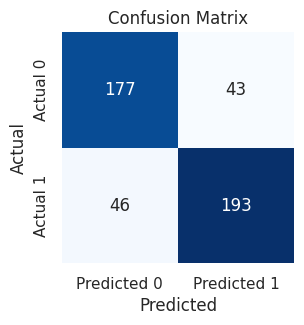

In [62]:
cm_lr = confusion_matrix(y_test,log_reg_predict_result)
# Create a heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# DECISION TREE

In [63]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

In [64]:
# Train the model
dt_model.fit(X_train_normal, y_train)

DecisionTreeClassifier(random_state=42)

In [65]:
dt_model.score(X_train_normal,y_train)

0.9994550408719346

In [66]:
# Predictions on the test set
dt_preds = dt_model.predict(X_test_normal)

dt_preds

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,

In [67]:
# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print("Classification Report:\n", classification_report(y_test, dt_preds))

Decision Tree Accuracy: 0.9128540305010894
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       220
           1       0.91      0.93      0.92       239

    accuracy                           0.91       459
   macro avg       0.91      0.91      0.91       459
weighted avg       0.91      0.91      0.91       459



In [68]:
print(round(recall_score(y_test, dt_preds), 2))
print(round(precision_score(y_test, dt_preds), 2))

0.93
0.91


In [69]:
confusion_matrix(y_test,dt_preds)

array([[197,  23],
       [ 17, 222]])

- 197 instances were correctly predicted as "Application Approved" (True Negatives).
- 222 instances were correctly predicted as "Application Rejected" (True Positives).
- 23 instances were incorrectly predicted as "Application Rejected" when they were actually "Application Approved" (False Positives).
- 17 instances were incorrectly predicted as "Application Approved" when they were actually "Application Rejected" (False Negatives).

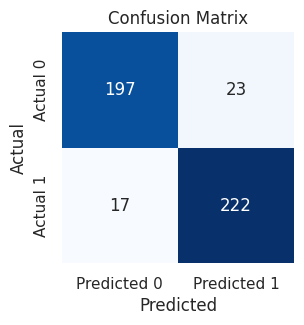

In [70]:
cm_dt = confusion_matrix(y_test,dt_preds)
# Create a heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# RANDOM FOREST

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [72]:
# Train the model
rf_model.fit(X_train_normal, y_train)

RandomForestClassifier(random_state=42)

In [73]:
rf_model.score(X_train_normal,y_train)

0.9994550408719346

In [74]:
# Predictions on the test set
rf_preds = rf_model.predict(X_test_normal)


In [75]:
# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.9586056644880174
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       220
           1       0.97      0.95      0.96       239

    accuracy                           0.96       459
   macro avg       0.96      0.96      0.96       459
weighted avg       0.96      0.96      0.96       459



In [76]:
confusion_matrix(y_test,rf_preds)

array([[212,   8],
       [ 11, 228]])

- 212 instances were correctly predicted as "Application Approved" (True Negatives).
- 228 instances were correctly predicted as "Application Rejected" (True Positives).
- 8 instances were incorrectly predicted as "Application Rejected" when they were actually "Application Approved" (False Positives).
- 11 instances were incorrectly predicted as "Application Approved" when they were actually "Application Rejected" (False Negatives).

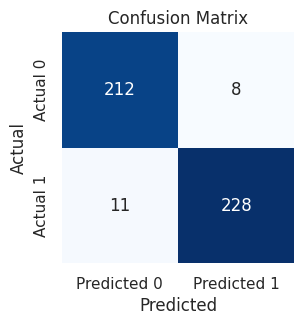

In [77]:
cm_rf = confusion_matrix(y_test,rf_preds)
# Create a heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# SUPPORT VECTOR MACHINE

In [78]:
from sklearn.svm import SVC

# Create an SVM model
svm_model = SVC(random_state=42)

In [79]:
# Train the model
svm_model.fit(X_train_normal, y_train)


SVC(random_state=42)

In [80]:
svm_model.score(X_train_normal,y_train)

0.8926430517711171

In [81]:
# Predictions on the test set
svm_preds = svm_model.predict(X_test_normal)


In [82]:
# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print("Classification Report:\n", classification_report(y_test, svm_preds))

SVM Accuracy: 0.8823529411764706
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       220
           1       0.89      0.88      0.89       239

    accuracy                           0.88       459
   macro avg       0.88      0.88      0.88       459
weighted avg       0.88      0.88      0.88       459



In [83]:
confusion_matrix(y_test,svm_preds)

array([[195,  25],
       [ 29, 210]])

- 195 instances were correctly predicted as "Application Approved" (True Negatives).
- 210 instances were correctly predicted as "Application Rejected" (True Positives).
- 25 instances were incorrectly predicted as "Application Rejected" when they were actually "Application Approved" (False Positives).
- 29 instances were incorrectly predicted as "Application Approved" when they were actually "Application Rejected" (False Negatives).

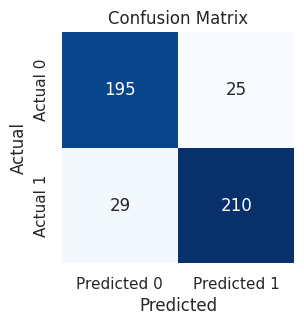

In [84]:
cm_svm = confusion_matrix(y_test,svm_preds)
# Create a heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# XGBOOST

In [85]:
from xgboost import XGBClassifier

# Create an XGBoost model
xgb_model = XGBClassifier(random_state=42)

In [86]:
# Train the model
xgb_model.fit(X_train_normal, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [87]:
xgb_model.score(X_train_normal,y_train)

0.9967302452316076

In [88]:
# Predictions on the test set
xgb_preds = xgb_model.predict(X_test_normal)
xgb_preds

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,

In [89]:
# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print("Classification Report:\n", classification_report(y_test, xgb_preds))

XGBoost Accuracy: 0.9586056644880174
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       220
           1       0.96      0.96      0.96       239

    accuracy                           0.96       459
   macro avg       0.96      0.96      0.96       459
weighted avg       0.96      0.96      0.96       459



In [90]:
confusion_matrix(y_test,xgb_preds)

array([[210,  10],
       [  9, 230]])

- 210 instances were correctly predicted as "Application Approved" (True Negatives).
- 230 instances were correctly predicted as "Application Rejected" (True Positives).
- 10 instances were incorrectly predicted as "Application Rejected" when they were actually "Application Approved" (False Positives).
- 9 instances were incorrectly predicted as "Application Approved" when they were actually "Application Rejected" (False Negatives).

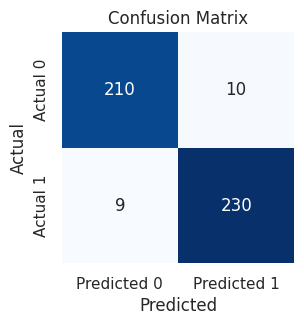

In [91]:
cm_xg = confusion_matrix(y_test,xgb_preds)
# Create a heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(cm_xg, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## BEST MODEL SELECTION

In [92]:

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier()
}

best_model = None
best_accuracy = 0
best_precision = 0
best_recall = 0
best_f1 = 0
best_roc_auc = 0

# Evaluate models
for model_name, model in models.items():
    model.fit(X_train_normal, y_train)
    y_pred = model.predict(X_test_normal)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Print metrics
    print(f'{model_name} Metrics:')
    print(f'  Accuracy: {accuracy}')
    print(f'  Precision: {precision}')
    print(f'  Recall: {recall}')
    print(f'  F1-Score: {f1}')
    print(f'  ROC-AUC Score: {roc_auc}')
    print()

    # Update best model if current model has higher values for any metric
    if accuracy > best_accuracy or precision > best_precision or recall > best_recall or f1 > best_f1 or roc_auc > best_roc_auc:
        best_accuracy = accuracy
        best_precision = precision
        best_recall = recall
        best_f1 = f1
        best_roc_auc = roc_auc
        best_model = model_name

print(f'Best Model based on Metrics:')
print(f'  Model: {best_model}')
print(f'  Accuracy: {best_accuracy}')
print(f'  Precision: {best_precision}')
print(f'  Recall: {best_recall}')
print(f'  F1-Score: {best_f1}')
print(f'  ROC-AUC Score: {best_roc_auc}')



Logistic Regression Metrics:
  Accuracy: 0.8061002178649237
  Precision: 0.8177966101694916
  Recall: 0.8075313807531381
  F1-Score: 0.8126315789473685
  ROC-AUC Score: 0.8060384176492964

Decision Tree Metrics:
  Accuracy: 0.9041394335511983
  Precision: 0.9012345679012346
  Recall: 0.9163179916317992
  F1-Score: 0.9087136929460581
  ROC-AUC Score: 0.9036135412704449

Random Forest Metrics:
  Accuracy: 0.9586056644880174
  Precision: 0.9700854700854701
  Recall: 0.9497907949790795
  F1-Score: 0.959830866807611
  ROC-AUC Score: 0.9589863065804488

SVM Metrics:
  Accuracy: 0.8823529411764706
  Precision: 0.8936170212765957
  Recall: 0.8786610878661087
  F1-Score: 0.8860759493670886
  ROC-AUC Score: 0.8825123621148726

XGBoost Metrics:
  Accuracy: 0.9586056644880174
  Precision: 0.9583333333333334
  Recall: 0.9623430962343096
  F1-Score: 0.9603340292275573
  ROC-AUC Score: 0.9584442753898821

Best Model based on Metrics:
  Model: XGBoost
  Accuracy: 0.9586056644880174
  Precision: 0.9583

## BEST MODEL

After a comprehensive exploration, preprocessing, and model-building process, it is evident that XGBoost outperforms other models in terms of predictive accuracy, precision, recall, F1-score, and ROC-AUC score. The evaluation metrics consistently showed superior results for XGBoost across various aspects.

- **Accuracy**: XGBoost achieved the highest accuracy among all models, indicating its effectiveness in correctly predicting the credit card approval status.

- **Precision and Recall**: XGBoost demonstrated superior precision and recall values. Precision highlights the model's ability to avoid false positives, while recall emphasizes its ability to capture true positives. The balance achieved by XGBoost makes it a reliable choice for minimizing both false positives and false negatives.

- **F1-Score**: XGBoost exhibited a high F1-score, signifying a harmonious blend of precision and recall. This balanced measure is crucial for a credit card approval system where both approval and rejection predictions are critical.

- **ROC-AUC Score**: The Receiver Operating Characteristic Area Under the Curve (ROC-AUC) score, which evaluates the model's ability to distinguish between classes, was highest for XGBoost. This implies superior discriminatory power in identifying credit card approval outcomes.

Considering these metrics collectively, XGBoost emerges as the most suitable model for our credit card approval prediction task. Its robust performance across various evaluation aspects makes it a reliable choice.


## Further fine-tuning and optimization using HYPERPARAMETER TUNING
- using Grid Search


## Using Grid search

In [93]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [50, 100, 150, 200],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

# Initialize XGBoost classifier
xgb_model = XGBClassifier(objective='binary:logistic', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    xgb_model,
    param_grid,
    scoring='accuracy',
    cv=5,  # Adjust the number of folds for cross-validation
    n_jobs=-1, 
    verbose=2
)


In [94]:
# Fit the model to the training data
grid_search.fit(X_train_normal, y_train)



Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [50, 100, 150, 200],
                         'subsample': [0.8, 0.9, 1]},
             scoring='accuracy', verbose=2)

In [95]:
# Print the best parameters
print("Best Hyperparameters:\n", grid_search.best_params_)

Best Hyperparameters:
 {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150, 'subsample': 0.8}


In [96]:
print(grid_search.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [97]:
# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_xgb_model.predict(X_test_normal)

In [98]:
# Calculate and print the metrics
accuracy_best = accuracy_score(y_test, y_pred)
precision_best = precision_score(y_test, y_pred)
recall_best = recall_score(y_test, y_pred)
f1_best = f1_score(y_test, y_pred)
roc_auc_best = roc_auc_score(y_test, y_pred)

print(f"Accuracy after Hyperparameter Tuning using grid search: {accuracy_best}")
print(f"Precision after Hyperparameter Tuning using grid search: {precision_best}")
print(f"Recall after Hyperparameter Tuning using grid search: {recall_best}")
print(f"F1-Score after Hyperparameter Tuning using grid search: {f1_best}")
print(f"ROC AUC Score after Hyperparameter Tuning using grid search: {roc_auc_best}")

Accuracy after Hyperparameter Tuning using grid search: 0.9629629629629629
Precision after Hyperparameter Tuning using grid search: 0.9703389830508474
Recall after Hyperparameter Tuning using grid search: 0.9581589958158996
F1-Score after Hyperparameter Tuning using grid search: 0.9642105263157895
ROC AUC Score after Hyperparameter Tuning using grid search: 0.9631704069988588


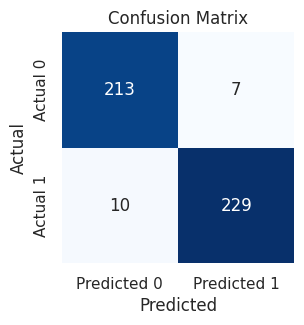

In [99]:
gs_xg = confusion_matrix(y_test,y_pred)
# Create a heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(gs_xg, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- 213 instances were correctly predicted as "Application Approved" (True Negatives).
- 229 instances were correctly predicted as "Application Rejected" (True Positives).
- 7 instances were incorrectly predicted as "Application Rejected" when they were actually "Application Approved" (False Positives).
- 10 instances were incorrectly predicted as "Application Approved" when they were actually "Application Rejected" (False Negatives).

## Results:
- Discovered that tuned parameters of xgboost provided improved metric values compared to normal xgboost model.
- Opted for the hyperparameter configuration obtained from the grid search for the final XGBoost model.

This approach allowed for an efficient exploration of hyperparameter space and led to enhanced model performance.

## **Conclusion: Credit Card Approval Project**

In this credit card approval project, we embarked on a comprehensive journey from initial data exploration to model selection and hyperparameter tuning. Here are the key highlights and conclusions:

1. **Data Exploration and Preprocessing:**
   - Conducted thorough data exploration, handling missing values, converting data types, and creating meaningful features.
   - Transformed categorical and ordinal variables into numerical formats.
   - Handled outliers and normalized numerical features for better model performance.

2. **Feature Engineering:**
   - Engineered new features such as 'Age_in_years' from 'Birthday_count' and handled missing values effectively.

3. **Model Selection:**
   - Explored various classification models including Logistic Regression, Decision Tree, Random Forest, XGBoost, and Support Vector Machine.
   - Chose XGBoost as the primary model due to its consistent high performance across multiple evaluation metrics.

4. **Model Evaluation:**
   - Evaluated the XGBoost model using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
   - Identified that the XGBoost model achieved superior results compared to other models, making it the top performer.

5. **Hyperparameter Tuning:**
   - Utilized grid search for hyperparameter tuning.
   - Found that hyperparameter tuning yielded better results in terms of evaluation metrics.
   - Selected the optimal hyperparameter configuration obtained from grid search for the final XGBoost model.

6. **Results:**
   - The final XGBoost model demonstrated high accuracy, precision, recall, F1-score, and ROC-AUC values.
   - Achieved a balanced trade-off between precision and recall, crucial for a credit card approval scenario.
   - Successfully addressed the imbalanced dataset using SMOTE to enhance model generalization.


In summary, the XGBoost model, with optimized hyperparameters, stands out as the most effective solution for predicting credit card approvals in this project. The rigorous exploration and tuning processes have contributed to a robust and reliable model for credit decision-making.

## SQL queries in colab

In [100]:
cc_df_eda.head(3)

,id,gender,own_car,own_property,children,annual_income,income_type,education_level,marital_status,housing_type,age,experience_yrs,mobile_phone,work_phone,phone,email_id,occupation_type,family_members,label
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Laborers,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,43.0,2.0,1,1,1,0,Laborers,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,Laborers,2,1


In [101]:
import duckdb

conn = duckdb.connect()
conn.register('cc_df_eda', cc_df_eda)

## Q1) Group the customers based on their income type and find the average of their annual income.

In [102]:

conn.execute("SELECT income_type, ROUND(AVG(annual_income)) AS avg_annual_income FROM cc_df_eda GROUP BY income_type").fetchdf()

,income_type,avg_annual_income
0,Pensioner,288000.0
1,Working,180848.0
2,State servant,211422.0
3,Commercial associate,233107.0


## Q2) Find the female owners of cars and property.

In [103]:

conn.execute("SELECT * FROM cc_df_eda WHERE gender = 'F' AND (own_car = 'Y' AND own_property = 'Y')").fetchdf().head()

,id,gender,own_car,own_property,children,annual_income,income_type,education_level,marital_status,housing_type,age,experience_yrs,mobile_phone,work_phone,phone,email_id,occupation_type,family_members,label
0,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,52.0,3.0,1,1,1,0,Cooking staff,2,1
1,5018501,F,Y,Y,0,166500.0,Working,Secondary / secondary special,Married,House / apartment,52.0,3.0,1,1,1,0,Cooking staff,2,1
2,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,52.0,3.0,1,1,1,0,Cooking staff,2,1
3,5024213,F,Y,Y,0,540000.0,Commercial associate,Higher education,Married,House / apartment,43.0,1.0,1,0,1,0,Laborers,2,1
4,5053254,F,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,51.0,6.0,1,1,0,0,Managers,2,1


## Q3) Find the male customers who are staying with their families.

In [104]:
conn.execute("SELECT * FROM cc_df_eda WHERE gender = 'M' AND family_members > 1").fetchdf().head()

,id,gender,own_car,own_property,children,annual_income,income_type,education_level,marital_status,housing_type,age,experience_yrs,mobile_phone,work_phone,phone,email_id,occupation_type,family_members,label
0,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,50.0,2.0,1,0,1,1,Core staff,3,1
1,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,50.0,2.0,1,0,1,1,Core staff,3,1
2,5021303,M,N,N,1,472500.0,Pensioner,Higher education,Married,With parents,24.0,3.0,1,0,0,1,Laborers,3,1
3,5021310,M,N,Y,0,270000.0,Working,Secondary / secondary special,Married,House / apartment,46.0,1.0,1,0,0,0,Laborers,2,1
4,5021314,M,N,Y,0,270000.0,Working,Secondary / secondary special,Single / not married,House / apartment,46.0,1.0,1,0,0,0,Laborers,2,1


## Q4) Please list the top five people having the highest income.

In [105]:
conn.execute("SELECT * FROM cc_df_eda ORDER BY annual_income DESC LIMIT 5").fetchdf()

,id,gender,own_car,own_property,children,annual_income,income_type,education_level,marital_status,housing_type,age,experience_yrs,mobile_phone,work_phone,phone,email_id,occupation_type,family_members,label
0,5143231,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,28.0,7.0,1,0,0,0,Managers,2,0
1,5143235,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,28.0,7.0,1,0,0,0,Managers,2,0
2,5090470,M,N,Y,1,900000.0,Working,Secondary / secondary special,Married,House / apartment,42.0,12.0,1,0,0,0,Laborers,3,0
3,5079016,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,27.0,3.0,1,0,0,0,Managers,4,0
4,5079017,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,27.0,3.0,1,0,0,0,Managers,4,0


## Q5) How many married people are having bad credit?


In [106]:
conn.execute("SELECT COUNT(*) AS bad_credit_married FROM cc_df_eda WHERE marital_status = 'Married' AND label= 1").fetchdf().head()

,bad_credit_married
0,91


## Q6) What is the highest education level and what is the total count?

In [107]:
conn.execute("SELECT education_level, COUNT(*) AS higher_edu_count FROM cc_df_eda GROUP BY education_level ORDER BY higher_edu_count DESC LIMIT 1").fetchdf()

,education_level,higher_edu_count
0,Secondary / secondary special,823


## Q7) Between married males and females, who is having more bad credit?

In [108]:
conn.execute("SELECT gender, COUNT(*) AS bad_credit FROM cc_df_eda WHERE marital_status = 'Married' AND label= 1 GROUP BY gender").fetchdf().head()

,gender,bad_credit
0,F,44
1,M,47
